In [1]:
#N.DHYANA SAI
#REG-NO:20BCE2956
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#load the dataset
data1=pd.read_csv("C:/Users/hp/Downloads/titanic.csv")

In [10]:
data1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


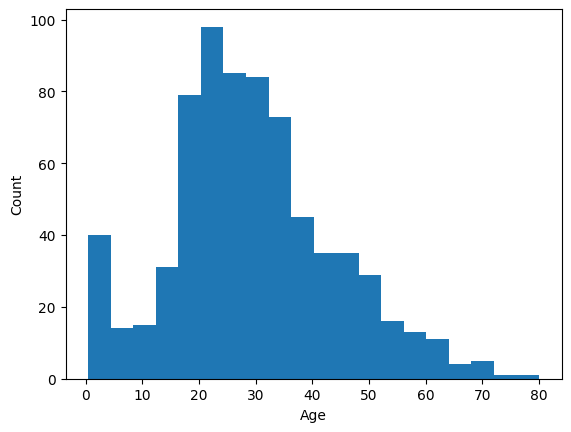

In [6]:
# Univariate analysis - Histogram
import matplotlib.pyplot as plt

plt.hist(data['age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<AxesSubplot: xlabel='age', ylabel='survived'>

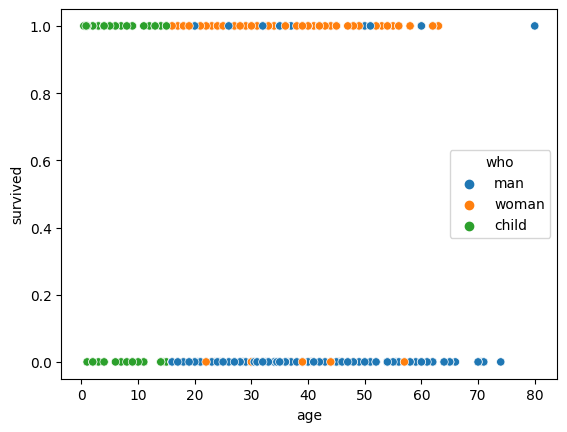

In [12]:
# Bivariate analysis - Scatter plot
sns.scatterplot(x='age', y='survived', data=data1, hue='who')

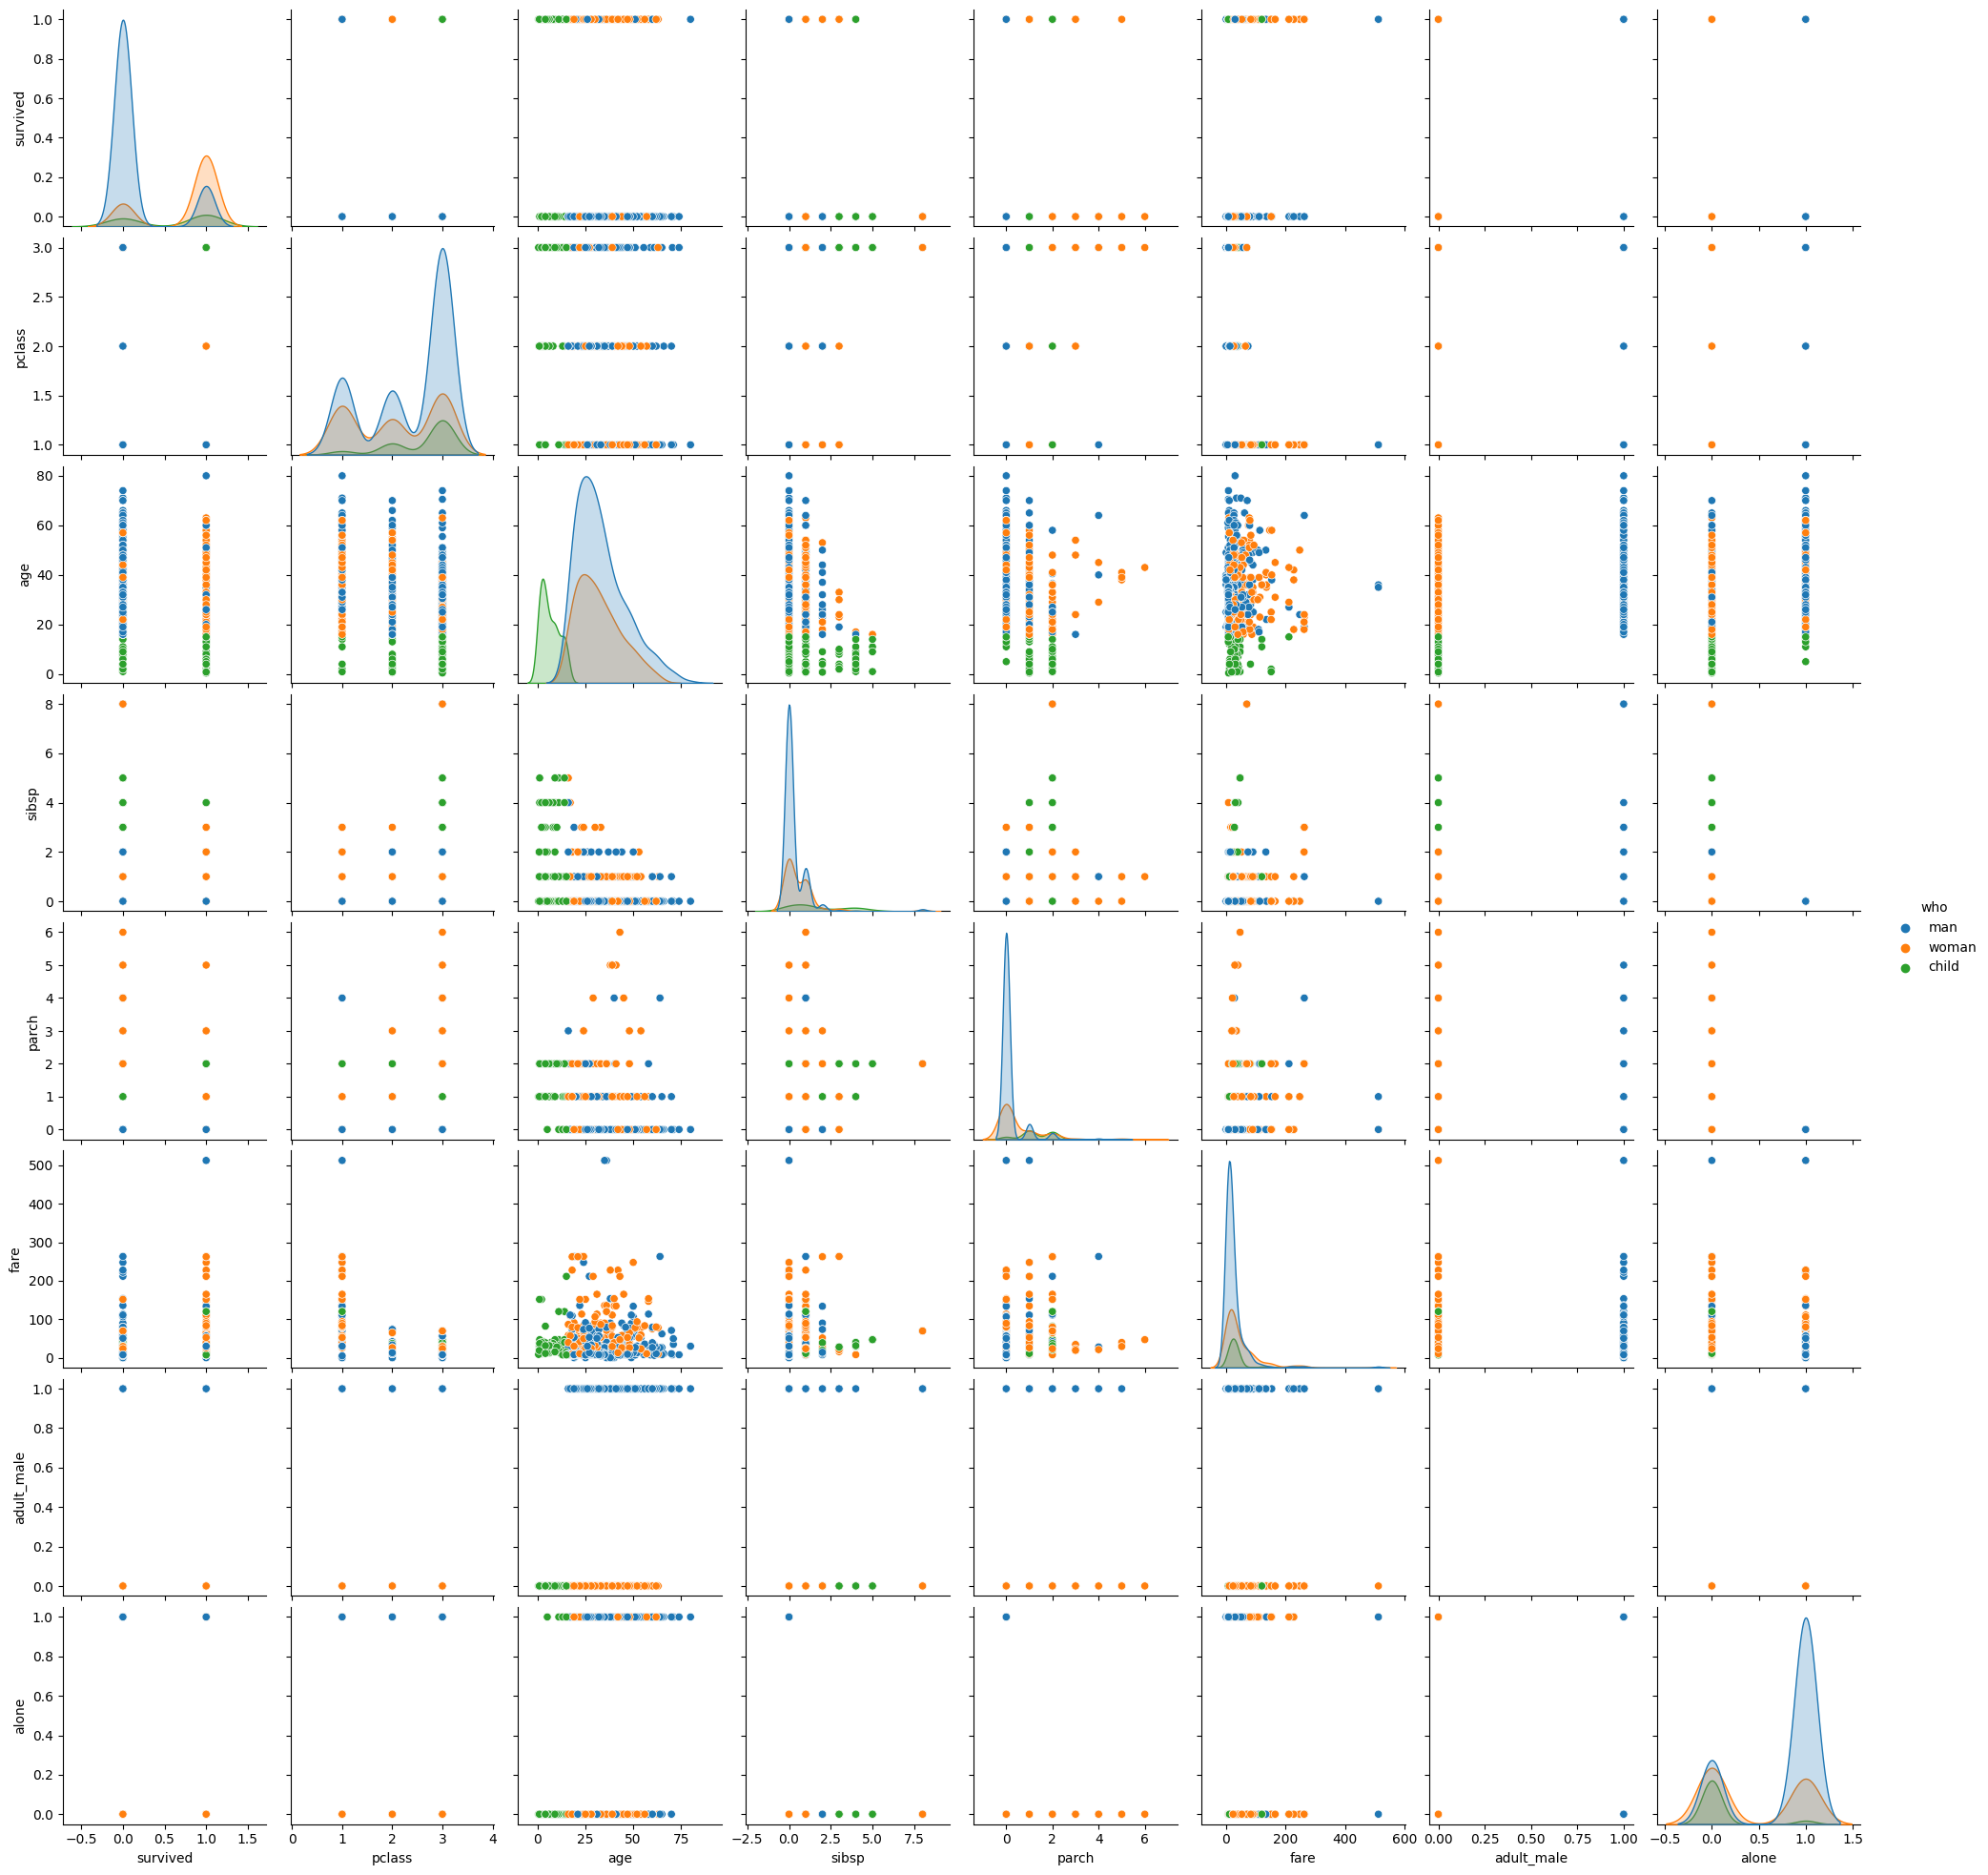

In [13]:
# Multivariate analysis - Pair plot
sns.pairplot(data, hue='who')

C:\Users\hp\AppData\Local\Temp\ipykernel_68\3203457264.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data1.corr()


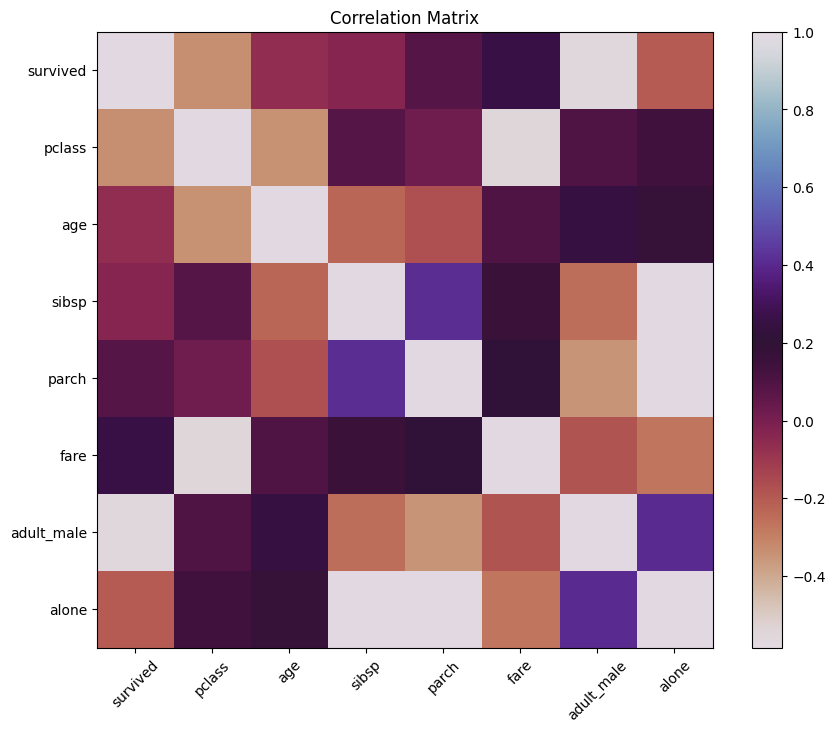

In [25]:
#Correlation_matrix
correlation_matrix = data1.corr()

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap='twilight_r', interpolation='nearest')
plt.colorbar(heatmap)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

In [14]:
# Descriptive statistics
data1.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Drop rows with missing values
data1.dropna(inplace=True)

In [14]:
median_age = data1['age'].median()
data1['age'].fillna(median_age, inplace=True)
data1['age']


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [26]:
# Find and replace outliers using Z-score
import numpy as np

# Calculate Z-scores for 'Age' column
z_scores = (data1['age'] - data1['age'].mean()) / data1['age'].std()

# Define a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = np.abs(z_scores) > threshold

# Replace outliers with a chosen value (e.g., median)
median_age = data1['age'].median()
data1.loc[outliers, 'age'] = median_age


In [20]:
#check for categorical columns

categorical_columns = data1.select_dtypes(include=["object"]).columns
print(categorical_columns)

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')


In [37]:
## Perform one-hot encoding
encoded_df = pd.get_dummies(data1, columns=['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive','adult_male','alone'])

In [39]:
encoded_df

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,...,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes,adult_male_False,adult_male_True,alone_False,alone_True
1,1,1,38.0,1,0,71.2833,1,0,1,0,...,0,1,0,0,0,1,1,0,1,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,1,0,1,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,1,0,0,...,0,0,0,1,1,0,0,1,0,1
10,1,3,4.0,1,1,16.7000,1,0,0,0,...,1,0,0,1,0,1,1,0,1,0
11,1,1,58.0,0,0,26.5500,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,1,1,52.5542,1,0,0,0,...,0,0,0,1,0,1,1,0,1,0
872,0,1,33.0,0,0,5.0000,0,1,0,0,...,0,0,0,1,1,0,0,1,0,1
879,1,1,56.0,0,1,83.1583,1,0,1,0,...,0,1,0,0,0,1,1,0,1,0
887,1,1,19.0,0,0,30.0000,1,0,0,0,...,0,0,0,1,0,1,1,0,0,1


In [45]:
# Split the data into dependent and independent variables
y=data1['survived']
y.head()

1     1
3     1
6     0
10    1
11    1
Name: survived, dtype: int64

In [47]:
x=data1.drop(columns=['survived'],axis=1)#dropping charges and storing the rest in x 
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [16]:
#  Scale the independent variables
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
data = pd.read_csv("C:/Users/hp/Downloads/titanic.csv")

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Split into dependent and independent variables
X = data_encoded.drop('survived', axis=1)  # Independent variables (features)
y = data_encoded['survived']               # Dependent variable (target)

# Initialize the scaler
scaler = StandardScaler()

# Scale the independent variables
X_scaled = scaler.fit_transform(X)

# Print the scaled data
print(X_scaled)

[[ 0.82737724 -0.53037664  0.43279337 ...  0.61930636  0.78927234
  -0.78927234]
 [-1.56610693  0.57183099  0.43279337 ... -1.61470971 -1.2669898
   1.2669898 ]
 [ 0.82737724 -0.25482473 -0.4745452  ...  0.61930636 -1.2669898
   1.2669898 ]
 ...
 [ 0.82737724         nan  0.43279337 ...  0.61930636  0.78927234
  -0.78927234]
 [-1.56610693 -0.25482473 -0.4745452  ... -1.61470971 -1.2669898
   1.2669898 ]
 [ 0.82737724  0.15850313 -0.4745452  ... -1.61470971  0.78927234
  -0.78927234]]


In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
331,1,45.5,0,0,28.5000,True,True,0,1,0,...,1,0,0,0,0,0,0,1,1,0
733,2,23.0,0,0,13.0000,True,True,0,1,0,...,0,0,0,0,0,0,0,1,1,0
382,3,32.0,0,0,7.9250,True,True,0,1,0,...,0,0,0,0,0,0,0,1,1,0
704,3,26.0,1,0,7.8542,True,False,0,1,0,...,0,0,0,0,0,0,0,1,1,0
813,3,6.0,4,2,31.2750,False,False,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [21]:
X_test.head()

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
709,3,NaN,1,1,15.2458,True,False,0,1,1,...,0,0,0,0,0,1,0,0,0,1
439,2,31.0,0,0,10.5000,True,True,0,1,0,...,0,0,0,0,0,0,0,1,1,0
840,3,20.0,0,0,7.9250,True,True,0,1,0,...,0,0,0,0,0,0,0,1,1,0
720,2,6.0,0,1,33.0000,False,False,1,0,0,...,0,0,0,0,0,0,0,1,0,1
39,3,14.0,1,0,11.2417,False,False,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [22]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: survived, dtype: int64

In [23]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: survived, dtype: int64

In [24]:

# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)


Training set shape: (712, 30) (712,)
Testing set shape: (179, 30) (179,)
